In [183]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [185]:
lead=pd.read_csv("C:\\Users\\Admin\\Downloads\\Lead Scoring Assignment\\Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [186]:
lead.shape

(9240, 37)

In [187]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [188]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [189]:
# Null values
lead.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [190]:
# percentage of null values
round(lead.isnull().sum()* 100/len(lead.index),2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [191]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [192]:
# drop columns which have null values more than 36% 
for col in lead.columns:
    if lead[col].isnull().sum()* 100/len(lead.index) > 36:
        lead.drop(col, axis=1, inplace=True)
        
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [193]:
round(lead.isnull().sum()* 100/len(lead.index),2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [194]:
for col in lead.columns:
    print("*"*50)
    print(col)
    print(lead[col].value_counts())

**************************************************
Prospect ID
2b8ff598-58ef-40af-b2ee-c734f844c965    1
0fcdc410-e6a1-45c2-a021-4546941699a3    1
d6279e7a-9739-4c75-8cf9-639ece9afa97    1
adc6b676-8dd4-4a32-aa78-adc792f52248    1
0974bd46-3138-4615-9574-4cc31f2a2f68    1
                                       ..
a91c3c64-59b0-4697-aa07-05fd4e385947    1
5cfdd915-d5a0-4976-b38d-e5f72ec55526    1
02093e9f-8924-4cd3-ba1f-d3ba869ae14c    1
7fc3270e-5e92-441a-b792-cc6d75981b19    1
bae0d183-f390-4d1e-bcb9-e76ae0cfd888    1
Name: Prospect ID, Length: 9240, dtype: int64
**************************************************
Lead Number
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
**************************************************
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  

In [195]:
# Change google to Google
lead.loc[lead["Lead Source"]=="google","Lead Source"] = "Google"

In [196]:
# "last Acctivity" and "Last Notable Activity" have common calssification
print(lead["Last Activity"].value_counts())
print("*"*50)
print(lead["Last Notable Activity"].value_counts())


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64
**************************************************
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed               

* "Last activiy" and "Last Notable activity" are highly correleated here is good to drop one column from these

* "Receive More Updates About Our Courses",'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque'columns have only one single category ie. "No". they should be dropped.

In [197]:
# removing redundant columns from above observation
lead.drop(['Prospect ID', 'Lead Number', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Last Activity'], axis=1, inplace=True)


In [198]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### "select"
* Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value. "Select" variable tell that customer not selected any prefernces. 

In [199]:
# Columns which have "Select" as category

select = []
for col in lead.columns:
    if("Select" in lead[col].unique()):
        select.append(col) 
            
print(select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


## Replacing "Select" into NaN 

In [200]:
lead.Specialization.replace("Select",np.NaN, inplace=True)

lead[select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,Select,Select,Select
1,NaN,Select,Select,Select
2,Business Administration,Select,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Select,Mumbai
4,NaN,Other,Select,Mumbai


In [201]:
lead["How did you hear about X Education"].replace("Select",np.NaN, inplace=True)
lead[select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,Select,Select
1,NaN,NaN,Select,Select
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,Select,Mumbai
4,NaN,Other,Select,Mumbai


In [202]:
lead["Lead Profile"].replace("Select",np.NaN, inplace=True)
lead[select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,Select
1,NaN,NaN,NaN,Select
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai


In [203]:
lead.City.replace("Select",np.NaN, inplace=True)
lead[select].head()

,Specialization,How did you hear about X Education,Lead Profile,City
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,Business Administration,NaN,Potential Lead,Mumbai
3,Media and Advertising,Word Of Mouth,NaN,Mumbai
4,NaN,Other,NaN,Mumbai


In [204]:
round(lead.isna().sum()*100/len(lead.index),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search    

In [205]:
# drop column which have more than 50% null values
lead.drop(["How did you hear about X Education","Lead Profile"],inplace=True,axis=1)


In [206]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [207]:
# "What matters most to you in choosing a course" has imbalance classification. so we should drop it
lead.drop(["What matters most to you in choosing a course"],axis=1, inplace=True)

In [208]:
lead["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [209]:
# "City" column has no important data and very imbalance data, so we should drop it
lead.drop(["City"],axis=1,inplace=True)

In [210]:
lead["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Italy                      2
Ghana                      2
Belgium                    2
China                      2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Bangladesh                 2
Liberia                    1
Vietnam                    1
Malaysia                   1
Russia                     1
Denmark                    1
Kenya                      1
Tanzania      

In [211]:
# "Country" column has more number of classification and imbalance data, so drop it
lead.drop(["Country"],axis=1,inplace=True)

In [212]:
round(lead.isna().sum()*100/len(lead.index),2).sort_values(ascending=False)

Specialization                            36.58
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Lead Source                                0.39
Newspaper Article                          0.00
A free copy of Mastering The Interview     0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Lead Origin                                0.00
Magazine                                   0.00
Search                                     0.00
Total Time Spent on Website                0.00
Converted                                  0.00
Do Not Call                                0.00
Do Not Email                               0.00
Last Notable Activity                      0.00
dtype: float64

In [213]:
lead["Specialization"].value_counts() 

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [214]:
# dropping "Specialization" column B'se of high missing values
lead.drop("Specialization", axis=1,inplace=True)

In [215]:
lead=lead[~lead["TotalVisits"].isnull()]
lead=lead[~lead["Page Views Per Visit"].isnull()]
lead=lead[~lead["Lead Source"].isnull()]

In [216]:
lead.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
What is your current occupation           2683
Search                                       0
Magazine                                     0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [217]:
#find the mode of occupation_mode
occupation_mode=lead["What is your current occupation"].mode()[0]
occupation_mode


'Unemployed'

In [218]:
# fill Occupation columnn with mode
lead["What is your current occupation"].fillna(occupation_mode, inplace=True)

In [219]:
lead["What is your current occupation"].isnull().sum()

0

In [220]:
lead.shape

(9074, 18)

In [221]:
print(len(lead.index)/9240)

0.982034632034632


In [222]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Unemployed,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Unemployed,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Student,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unemployed,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Unemployed,No,No,No,No,No,No,No,No,Modified


# DATA MODELING

In [223]:
from pandas_profiling import ProfileReport


In [224]:
ProfileReport(lead)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### From Profiling report , we observed that some column has imbalance variable. Means only one value is majorly presented. we should drop these columns

In [225]:
lead.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [226]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [227]:
lead.shape

(9074, 10)

In [228]:
lead_nonnum=list(lead.select_dtypes(include='object'))
lead_num=list(lead.select_dtypes(exclude='object'))
print(lead_nonnum)
print(lead_num)

len(lead_nonnum),len(lead_num)

['Lead Origin', 'Lead Source', 'Do Not Email', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']
['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


(6, 4)

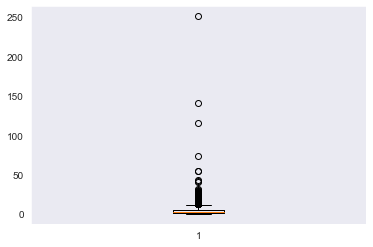

In [229]:
plt.boxplot(lead["TotalVisits"])
plt.show()


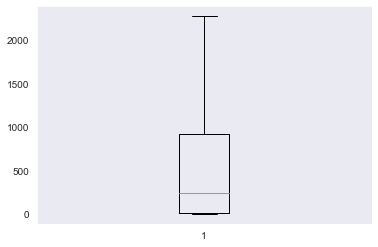

In [230]:
plt.boxplot(lead["Total Time Spent on Website"])
plt.show()


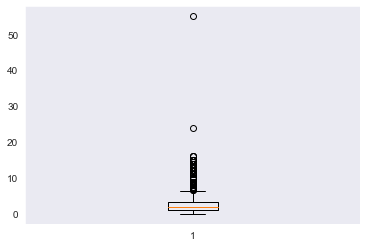

In [231]:
plt.boxplot(lead["Page Views Per Visit"])
plt.show()


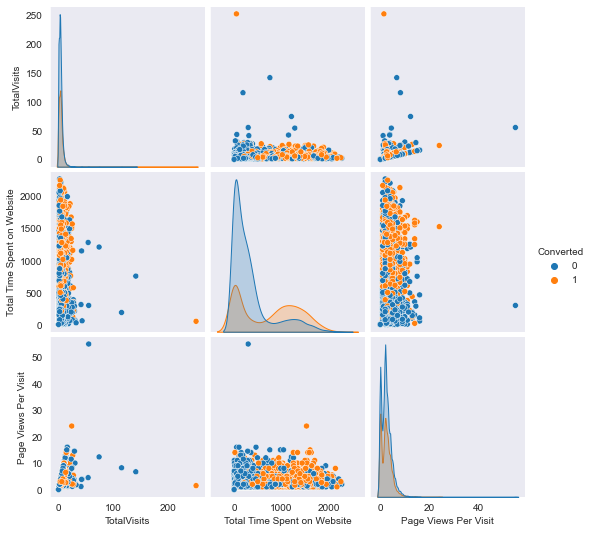

In [232]:

x= lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x,diag_kind='kde',hue='Converted')
plt.show()

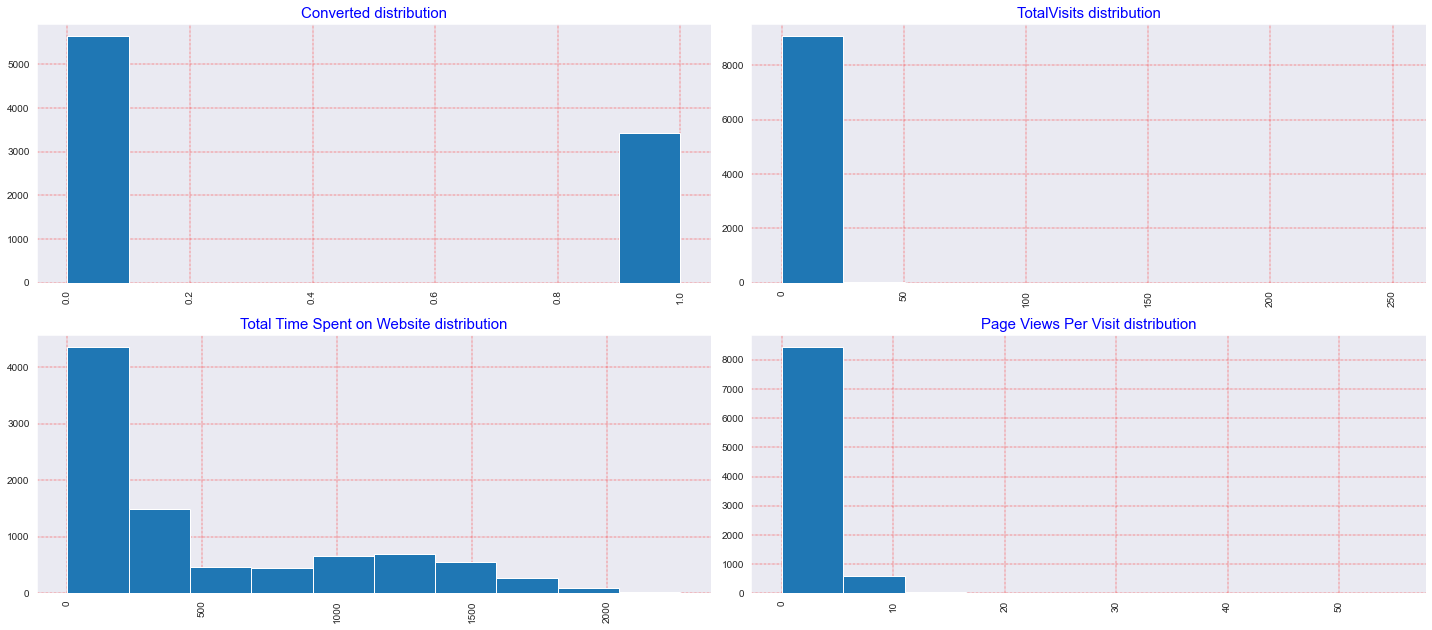

In [233]:
# calculation for subplots
ct=1

# Setting figure size
plt.figure(2,figsize=(20,30))

for cat in lead_num:
    sns.set_style("dark")
    plt.subplot(7,2,ct)
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                linestyle='-')
    
    plt.hist(lead[cat])
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=15)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

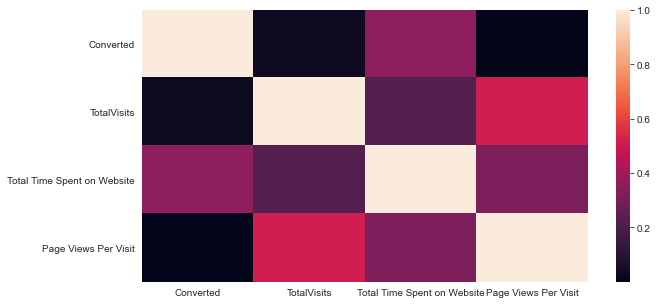

In [234]:
# visualizing correlation by heatmap
plt.figure(figsize=(10,5))
sns.heatmap(lead.corr())
plt.show()


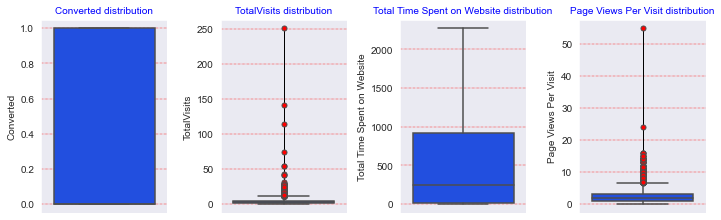

In [235]:
# Plot for outliers
# Analyze outliers for quantitative variables

# calculation for subplots
ln = len(lead_num)
n=4
m=(ln//n)+1
ct=1


# Setting figure size
plt.figure(2,figsize=(10,6))

for cat in lead_num:
    sns.set_style("dark")
    plt.subplot(m,n,ct)
    plt.grid(color='r', linestyle='-.', linewidth=0.4)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                linestyle='-')
    
    sns.boxplot(y=lead[cat],palette="bright",flierprops=flierprops)
    title = cat + " distribution"
    plt.title(title,color="b",fontsize=10)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10,rotation=90)
    ct+=1
    
plt.tight_layout()
plt.show()

In [236]:
lead_nonnum


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

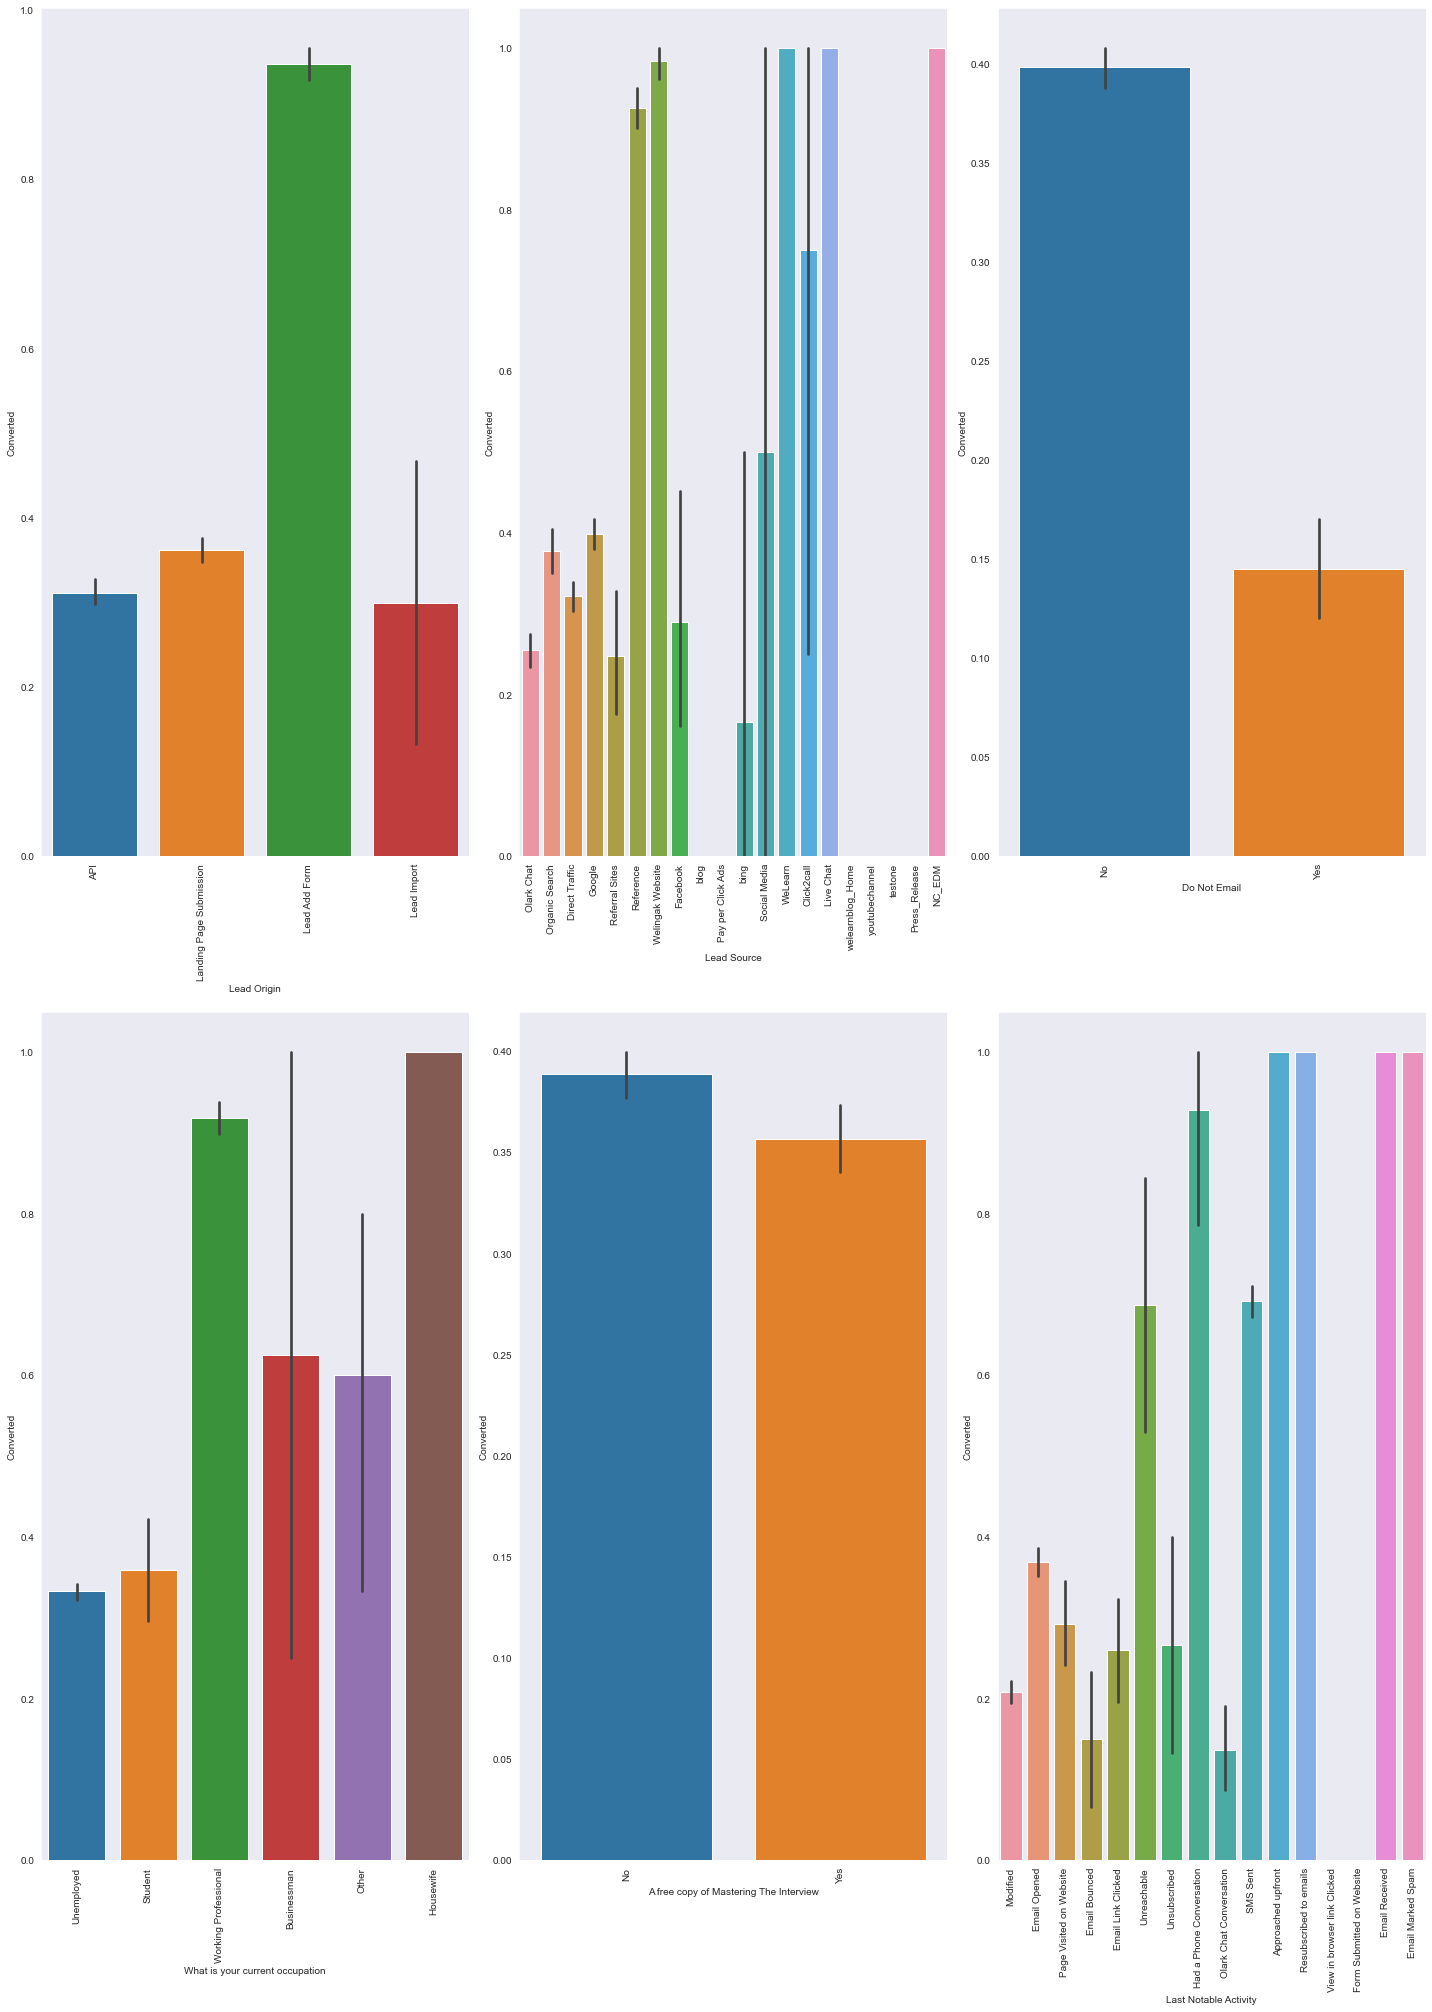

In [237]:
ln = len(lead_nonnum)
n=3
m=(ln//n)+1
ct=1

plt.figure(2,figsize=(20,40))

# Running in loop to plot all columns as subplot
for column in lead_nonnum:
    plt.subplot(m,n,ct)

    plt.xticks(rotation=90)
    sns.barplot(x=column,y="Converted",data=lead)
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [238]:
lead_nonnum

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

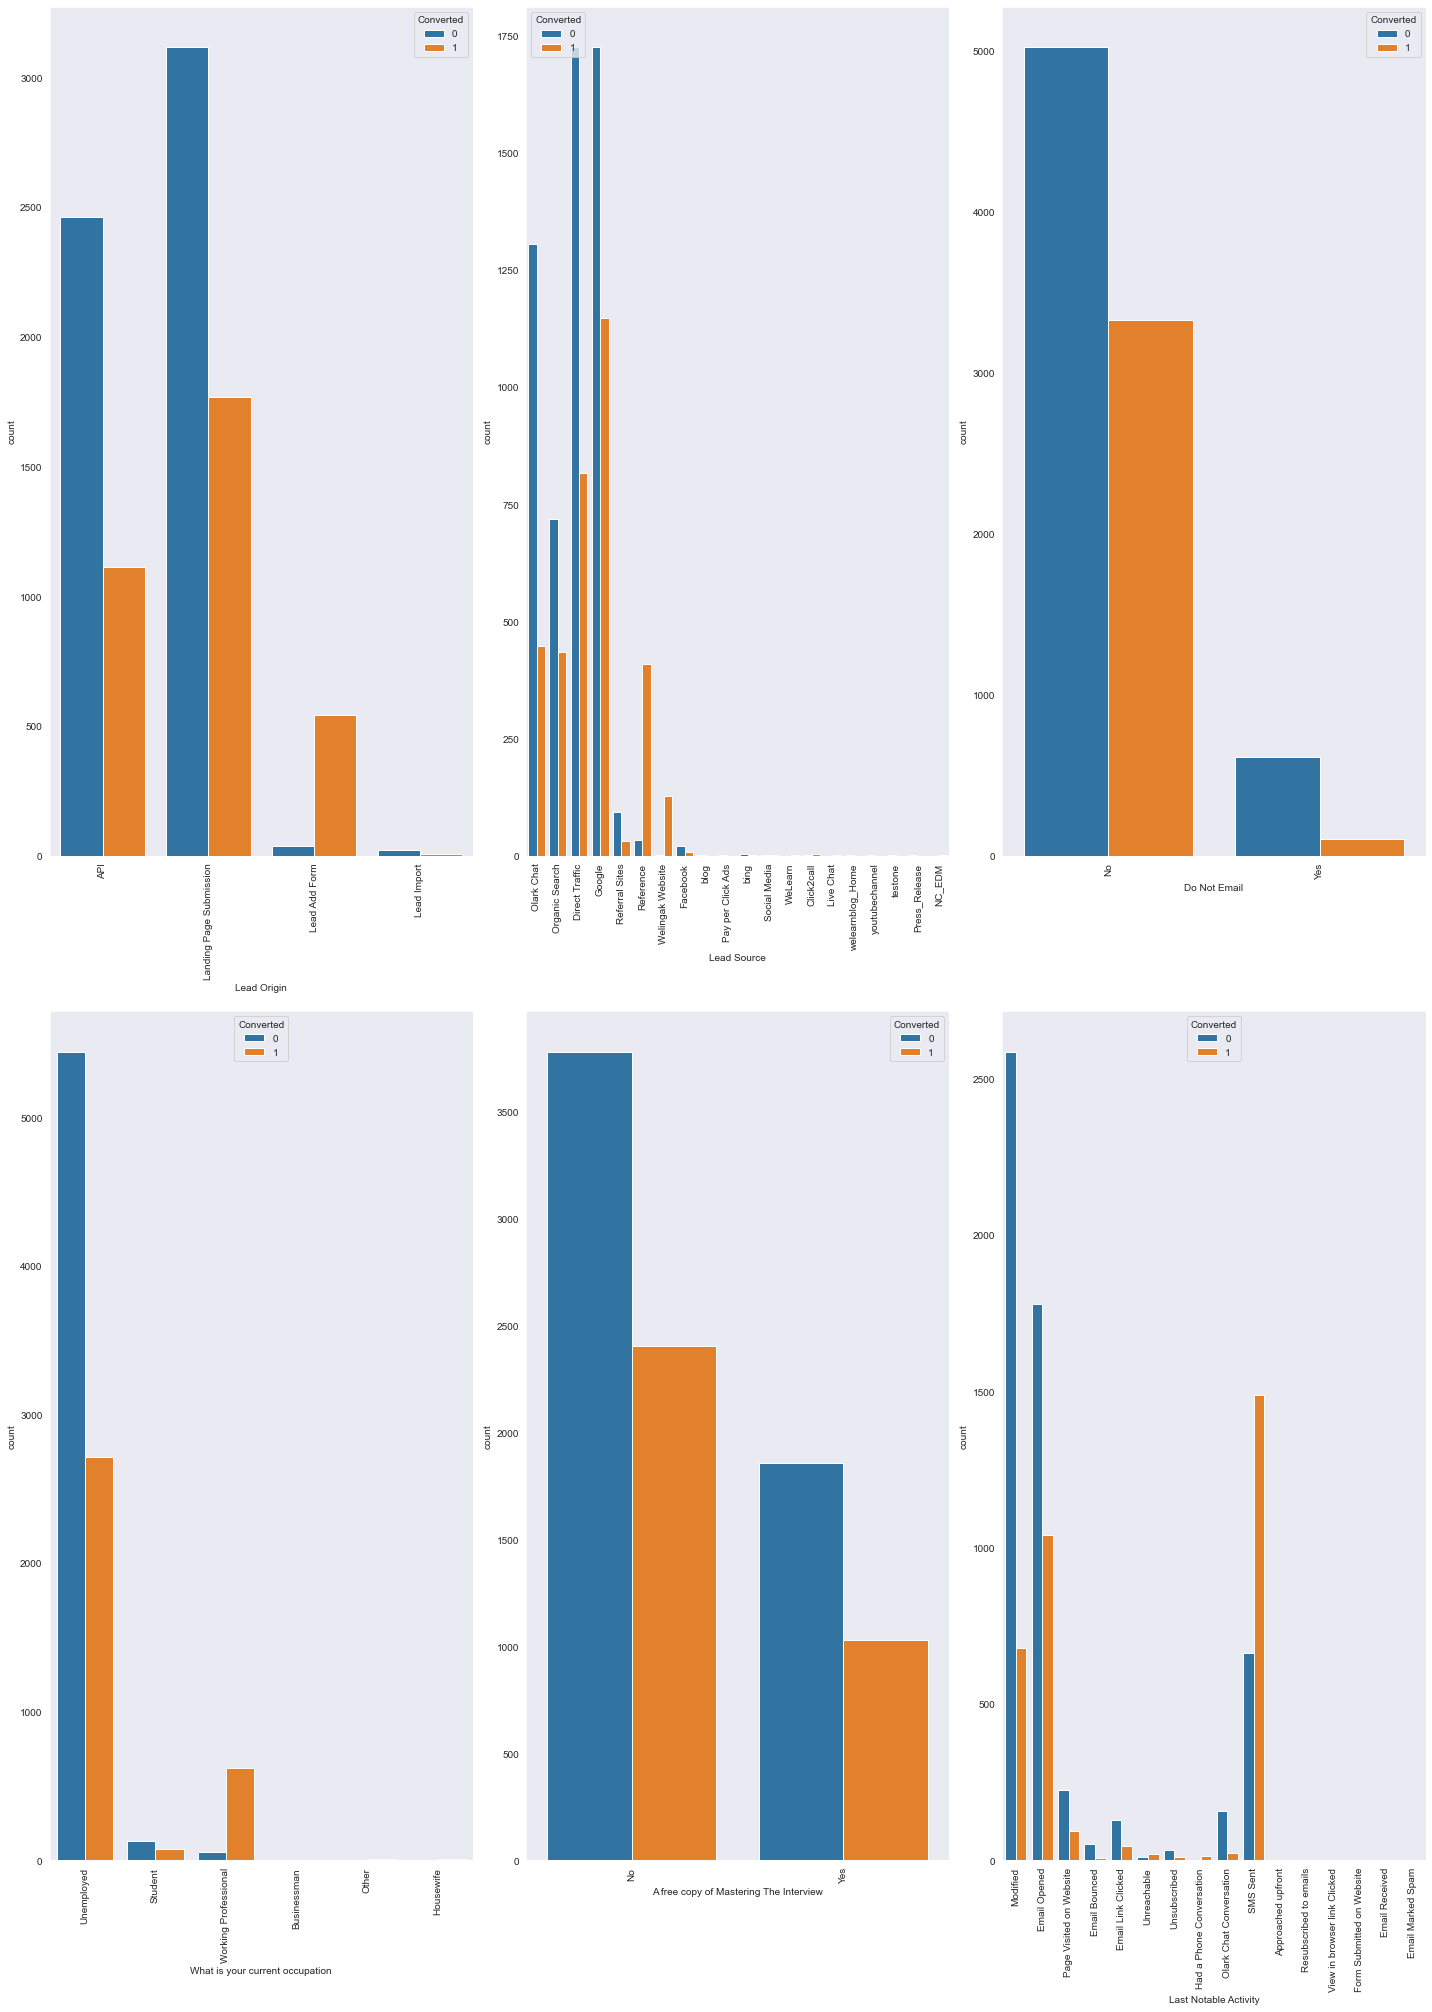

In [239]:
ln = len(lead_nonnum)
n=3
m=(ln//n)+1
ct=1

plt.figure(2,figsize=(20,40))

# Running in loop to plot all columns as subplot
for column in lead_nonnum:
    plt.subplot(m,n,ct)

    plt.xticks(rotation=90)
    #sns.barplot(x=column,y="Converted",data=lead)
    sns.countplot(column,hue="Converted",data=lead)
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

* In Lead Origin, "Landing Page Submission" is good indicator ie. lead convert into yes
* In Lead Source, "Google" is best source to lead convert into yes
* In occupation, Unemployed and working professional are more convert into yes
* In Last Notable Activity, "SMS Sent" is good indicator

In [240]:
lead[lead_num].describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


In [241]:
lead[lead_num].quantile(0.90)

Converted                         1.0
TotalVisits                       7.0
Total Time Spent on Website    1373.0
Page Views Per Visit              5.0
Name: 0.9, dtype: float64

In [242]:
lead[lead_num].quantile(0.99)

Converted                         1.0
TotalVisits                      17.0
Total Time Spent on Website    1839.0
Page Views Per Visit              9.0
Name: 0.99, dtype: float64

In [243]:
np.percentile(lead[lead_num],[5,50,75,90,98,99])

array([   0.  ,    2.  ,    6.  ,  367.  , 1445.  , 1601.05])

In [244]:
Q99=lead[lead_num].quantile(0.99)
Q99

Converted                         1.0
TotalVisits                      17.0
Total Time Spent on Website    1839.0
Page Views Per Visit              9.0
Name: 0.99, dtype: float64

In [245]:
lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


In [248]:
# Removing outliers
out_df = lead[lead_num].drop('Converted', axis=1)
q = out_df.quantile(0.98)
out_df = out_df[out_df < q]
out_df = out_df.dropna()

lead = lead.loc[out_df.index].reset_index(drop=True)

lead.shape

(8507, 10)

In [251]:
print(f"{round(len(lead)/9074*100,2)}% data has been retained after outlier removal.")


93.75% data has been retained after outlier removal.


In [250]:
lead[lead_num].quantile(0.99)

Converted                         1.0
TotalVisits                      11.0
Total Time Spent on Website    1653.0
Page Views Per Visit              7.0
Name: 0.99, dtype: float64

In [249]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No,Modified


In [252]:
for col in lead.columns:
    print("*"*50)
    print(col)
    print(lead[col].value_counts())

**************************************************
Lead Origin
Landing Page Submission    4459
API                        3446
Lead Add Form               573
Lead Import                  29
Name: Lead Origin, dtype: int64
**************************************************
Lead Source
Google               2719
Direct Traffic       2352
Olark Chat           1744
Organic Search        969
Reference             437
Welingak Website      128
Referral Sites        107
Facebook               30
bing                    6
Click2call              3
Live Chat               2
Social Media            2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
welearnblog_Home        1
blog                    1
NC_EDM                  1
youtubechannel          1
Name: Lead Source, dtype: int64
**************************************************
Do Not Email
No     7851
Yes     656
Name: Do Not Email, dtype: int64
*****************************************

In [253]:
varlist=["Do Not Email","A free copy of Mastering The Interview"]
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [254]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [255]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [256]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed,0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student,1,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed,0,Modified,...,0,0,1,0,0,0,0,0,0,0


In [257]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           8507 non-null   object 
 1   Lead Source                                           8507 non-null   object 
 2   Do Not Email                                          8507 non-null   int64  
 3   Converted                                             8507 non-null   int64  
 4   TotalVisits                                           8507 non-null   float64
 5   Total Time Spent on Website                           8507 non-null   int64  
 6   Page Views Per Visit                                  8507 non-null   float64
 7   What is your current occupation                       8507 non-null   object 
 8   A free copy of Mastering The Interview                8507

In [258]:
# We have created dummies for the below variables, so we can drop them
lead=lead.drop(['Lead Origin', 'Lead Source', 'What is your current occupation', 'Last Notable Activity'],1)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Train-test split

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
# Putting feature variable to X
X=lead.drop("Converted",1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [261]:
# Putting response variable to y
y=lead["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [262]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## FEATURE SCALING

* we drop all outlier of numrical column so data have not any outlier. So it is good to use MinMaxScaler.

In [264]:
from sklearn.preprocessing import MinMaxScaler

In [269]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
416,0,0.083333,0.088799,0.142857,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1100,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6132,0,0.333333,0.065583,0.571429,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4651,0,0.250000,0.756239,0.428571,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2837,1,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [270]:
# Checking the Converted Rate
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.01657458563536

# Looking at Correlations

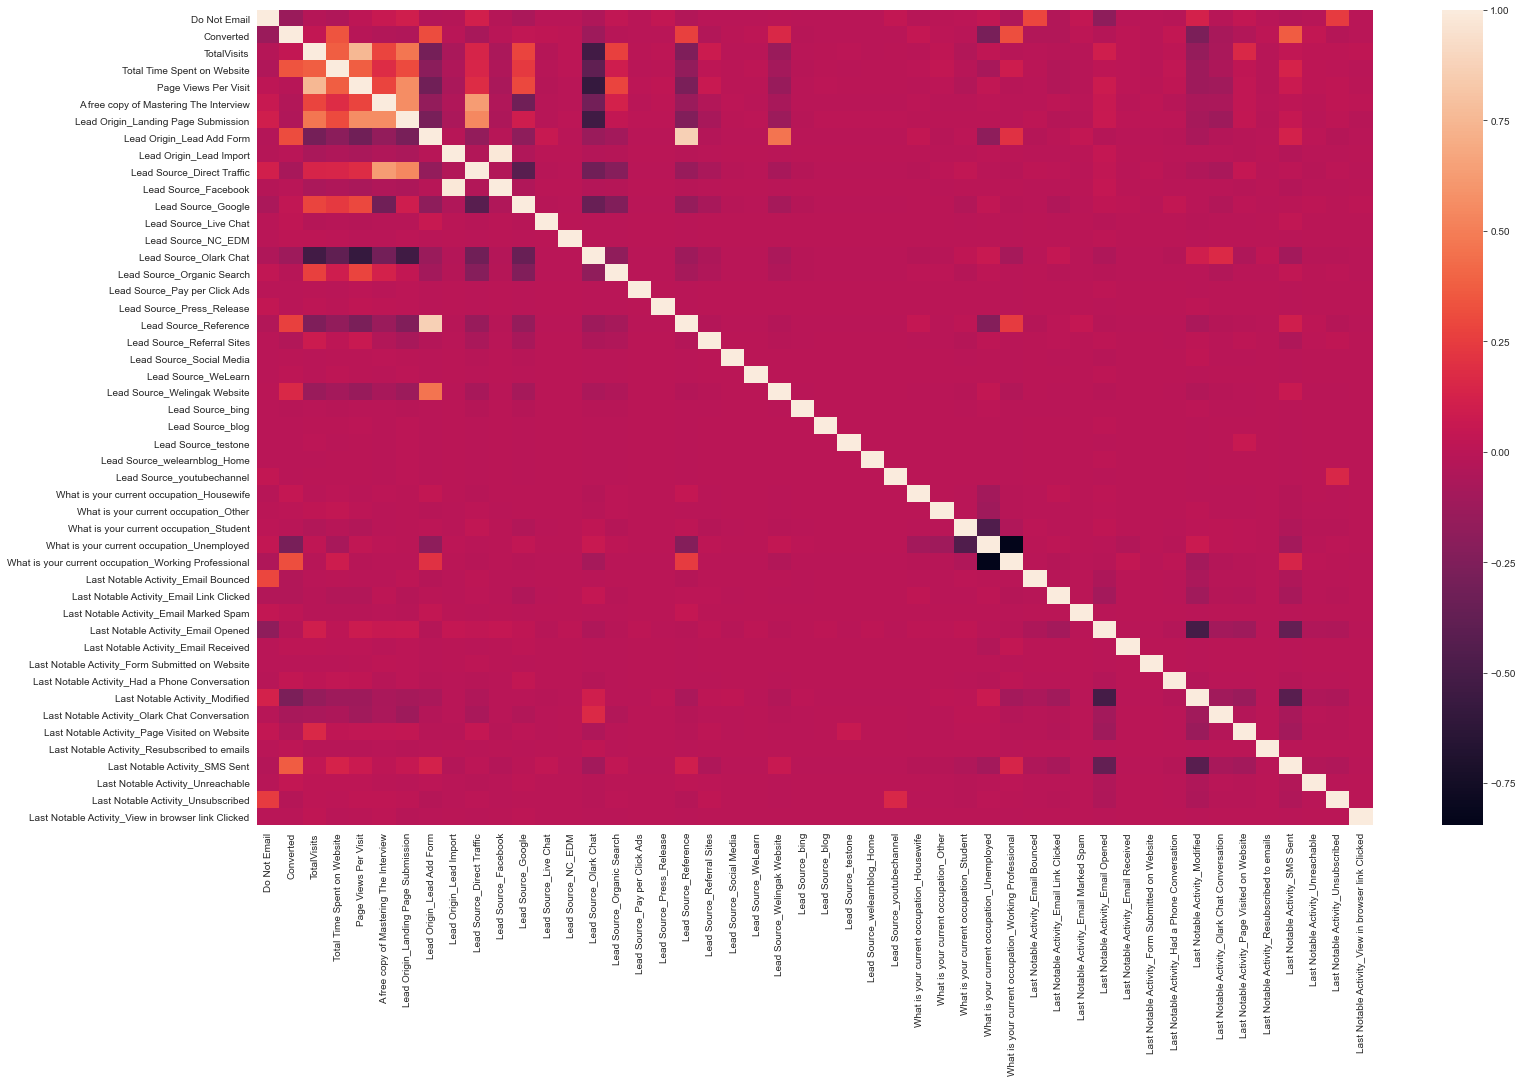

In [271]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(lead.corr())
plt.show()

# Model Building

In [272]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [273]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [274]:
rfe.support_

array([ True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True, False])

In [275]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Live Chat', False, 22),
 ('Lead Source_NC_EDM', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 31),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 27),
 ('Lead Source_blog', False, 14),
 ('Lead Source_testone', False, 23),
 (

In [276]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [277]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activit

In [278]:
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [279]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [280]:
# Import statsmodels

import statsmodels.api as sm

In [281]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5954
Model:                            GLM   Df Residuals:                     5938
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.4
Date:                Wed, 09 Feb 2022   Deviance:                       4954.8
Time:                        16:35:26   Pearson chi2:                 5.92e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9957      0.106    -28.197      0.000      -3.204      -2.787
Do Not Email                                            -1.5488      0.191     -8.120      0.000      -1.923      -1.175
TotalVisits                                              1.1076      0.215      5.141      0.000       0.685       1.530
Total Time Spent on Website                              3.7085      0.139     26.614      0.000       3.435       3.982
Lead Origin_Lead Add Form                                2.5805      0.953      2.707      0.007       0.712       4.449
Lead Origin_Lead Import                                  1.6964      0.660      2.571      0.010       0.403       2.990
Lead Source_Olark Chat                                   1.4010      0.122     11.473      0.000       1.162       1.640
Lead Source_Reference                                    1.9451      0.978      1.989      0.047       0.029       3.862
Lead Source_Welingak Website                             3.8162      1.196      3.190      0.001       1.472       6.161
What is your current occupation_Housewife               23.0869   2.01e+04      0.001      0.999   -3.93e+04    3.94e+04
What is your current occupation_Working Professional     2.8036      0.194     14.421      0.000       2.423       3.185
Last Notable Activity_Had a Phone Conversation          22.9927   1.43e+04      0.002      0.999   -2.79e+04     2.8e+04
Last Notable Activity_Olark Chat Conversation           -1.4437      0.367     -3.931      0.000      -2.164      -0.724
Last Notable Activity_SMS Sent                           1.8729      0.083     22.659      0.000       1.711       2.035
Last Notable Activity_Unreachable                        1.8318      0.518      3.535      0.000       0.816       2.848
Last Notable Activity_Unsubscribed                       1.4116      0.534      2.642      0.008       0.364       2.459
========================================================================================================================
"""

In [282]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,65.21
6,Lead Source_Reference,50.29
7,Lead Source_Welingak Website,16.01
2,Total Time Spent on Website,2.01
1,TotalVisits,1.95
12,Last Notable Activity_SMS Sent,1.37
9,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13
5,Lead Source_Olark Chat,1.08
14,Last Notable Activity_Unsubscribed,1.08


In [284]:
# Let's first drop the variable "Lead Source_Reference" since it has a high p-value as well as a high VIF.
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [285]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5954
Model:                            GLM   Df Residuals:                     5939
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2479.0
Date:                Wed, 09 Feb 2022   Deviance:                       4958.0
Time:                        16:45:29   Pearson chi2:                 5.89e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9929      0.106    -28.176      0.000      -3.201      -2.785
Do Not Email                                            -1.5457      0.190     -8.116      0.000      -1.919      -1.172
TotalVisits                                              1.1040      0.215      5.124      0.000       0.682       1.526
Total Time Spent on Website                              3.7057      0.139     26.598      0.000       3.433       3.979
Lead Origin_Lead Add Form                                4.4475      0.243     18.330      0.000       3.972       4.923
Lead Origin_Lead Import                                  1.6936      0.660      2.566      0.010       0.400       2.987
Lead Source_Olark Chat                                   1.3971      0.122     11.437      0.000       1.158       1.637
Lead Source_Welingak Website                             1.9459      0.758      2.566      0.010       0.459       3.432
What is your current occupation_Housewife               23.0865   2.01e+04      0.001      0.999   -3.93e+04    3.94e+04
What is your current occupation_Working Professional     2.8055      0.194     14.440      0.000       2.425       3.186
Last Notable Activity_Had a Phone Conversation          22.9920   1.43e+04      0.002      0.999   -2.79e+04     2.8e+04
Last Notable Activity_Olark Chat Conversation           -1.4414      0.367     -3.928      0.000      -2.161      -0.722
Last Notable Activity_SMS Sent                           1.8718      0.083     22.651      0.000       1.710       2.034
Last Notable Activity_Unreachable                        1.8328      0.518      3.539      0.000       0.818       2.848
Last Notable Activity_Unsubscribed                       1.4083      0.534      2.637      0.008       0.361       2.455
========================================================================================================================
"""

In [286]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.01
1,TotalVisits,1.95
3,Lead Origin_Lead Add Form,1.47
11,Last Notable Activity_SMS Sent,1.37
6,Lead Source_Welingak Website,1.33
8,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13
5,Lead Source_Olark Chat,1.08
13,Last Notable Activity_Unsubscribed,1.08
10,Last Notable Activity_Olark Chat Conversation,1.06


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [287]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [288]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5954
Model:                            GLM   Df Residuals:                     5940
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2485.8
Date:                Wed, 09 Feb 2022   Deviance:                       4971.6
Time:                        16:48:32   Pearson chi2:                 5.90e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9908      0.106    -28.203      0.000      -3.199      -2.783
Do Not Email                                            -1.5498      0.190     -8.140      0.000      -1.923      -1.177
TotalVisits                                              1.1222      0.215      5.224      0.000       0.701       1.543
Total Time Spent on Website                              3.7066      0.139     26.646      0.000       3.434       3.979
Lead Origin_Lead Add Form                                4.4465      0.243     18.333      0.000       3.971       4.922
Lead Origin_Lead Import                                  1.6915      0.660      2.563      0.010       0.398       2.985
Lead Source_Olark Chat                                   1.3963      0.122     11.442      0.000       1.157       1.635
Lead Source_Welingak Website                             1.9469      0.758      2.567      0.010       0.460       3.433
What is your current occupation_Housewife               22.0787   1.22e+04      0.002      0.999   -2.38e+04    2.39e+04
What is your current occupation_Working Professional     2.8074      0.194     14.465      0.000       2.427       3.188
Last Notable Activity_Olark Chat Conversation           -1.4470      0.367     -3.941      0.000      -2.167      -0.727
Last Notable Activity_SMS Sent                           1.8649      0.083     22.583      0.000       1.703       2.027
Last Notable Activity_Unreachable                        1.8256      0.518      3.525      0.000       0.811       2.841
Last Notable Activity_Unsubscribed                       1.4041      0.534      2.628      0.009       0.357       2.451
========================================================================================================================
"""

In [289]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [290]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5954
Model:                            GLM   Df Residuals:                     5941
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.6
Date:                Wed, 09 Feb 2022   Deviance:                       4981.3
Time:                        16:49:13   Pearson chi2:                 5.90e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.9834      0.106    -28.184      0.000      -3.191      -2.776
Do Not Email                                            -1.5536      0.190     -8.162      0.000      -1.927      -1.181
TotalVisits                                              1.1122      0.215      5.181      0.000       0.691       1.533
Total Time Spent on Website                              3.7134      0.139     26.716      0.000       3.441       3.986
Lead Origin_Lead Add Form                                4.4403      0.242     18.314      0.000       3.965       4.916
Lead Origin_Lead Import                                  1.6842      0.660      2.552      0.011       0.391       2.978
Lead Source_Olark Chat                                   1.3903      0.122     11.406      0.000       1.151       1.629
Lead Source_Welingak Website                             1.9474      0.758      2.567      0.010       0.461       3.434
What is your current occupation_Working Professional     2.8029      0.194     14.442      0.000       2.423       3.183
Last Notable Activity_Olark Chat Conversation           -1.4505      0.367     -3.950      0.000      -2.170      -0.731
Last Notable Activity_SMS Sent                           1.8599      0.083     22.531      0.000       1.698       2.022
Last Notable Activity_Unreachable                        1.8209      0.518      3.515      0.000       0.806       2.836
Last Notable Activity_Unsubscribed                       1.4017      0.534      2.623      0.009       0.354       2.449
========================================================================================================================
"""

In [292]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.01
1,TotalVisits,1.95
3,Lead Origin_Lead Add Form,1.47
9,Last Notable Activity_SMS Sent,1.37
6,Lead Source_Welingak Website,1.33
7,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13
5,Lead Source_Olark Chat,1.08
11,Last Notable Activity_Unsubscribed,1.08
8,Last Notable Activity_Olark Chat Conversation,1.06


Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

# Model Evaluation

In [293]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

416     0.071690
1100    0.168947
6132    0.085554
4651    0.876823
2837    0.041222
763     0.583641
5918    0.540159
1828    0.075361
8171    0.063420
3838    0.966023
dtype: float64

In [294]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07168999, 0.16894741, 0.085554  , 0.87682349, 0.04122153,
       0.5836411 , 0.54015941, 0.07536104, 0.06341987, 0.96602279])

In [295]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.071690
1,0,0.168947
2,0,0.085554
3,1,0.876823
4,0,0.041222


In [296]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.071690,0
1,0,0.168947,0
2,0,0.085554,0
3,1,0.876823,1
4,0,0.041222,0


In [306]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [298]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3330  420]
 [ 691 1513]]


In [299]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8134027544507894


In [301]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [302]:
# Calculate the sensitivity

TP/(TP+FN)

0.6864791288566243

In [303]:
# Calculate the specificity

TN/(TN+FP)

0.888

In [308]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.112


In [309]:
# positive predictive value 
print (TP / float(TP+FP))

0.7827211588204863


In [310]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8281522009450385


# Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [311]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [312]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

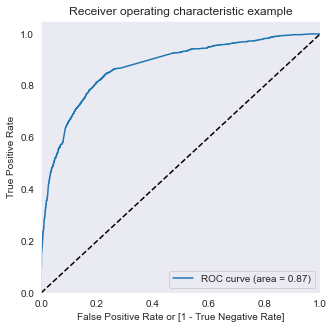

In [314]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Finding Optimal Cutoff Point

In [315]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.071690,0,1,0,0,0,0,0,0,0,0,0
1,0,0.168947,0,1,1,0,0,0,0,0,0,0,0
2,0,0.085554,0,1,0,0,0,0,0,0,0,0,0
3,1,0.876823,1,1,1,1,1,1,1,1,1,1,0
4,0,0.041222,0,1,0,0,0,0,0,0,0,0,0


In [316]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.370171  1.000000  0.000000
0.1   0.1  0.559792  0.961434  0.323733
0.2   0.2  0.786026  0.862069  0.741333
0.3   0.3  0.801142  0.821234  0.789333
0.4   0.4  0.811219  0.761343  0.840533
0.5   0.5  0.813403  0.686479  0.888000
0.6   0.6  0.796103  0.563521  0.932800
0.7   0.7  0.785858  0.496370  0.956000
0.8   0.8  0.769063  0.421960  0.973067
0.9   0.9  0.725059  0.275408  0.989333


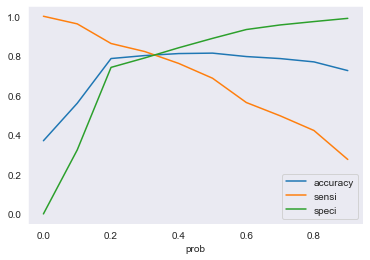

In [317]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


As you can see that around 0.3, you get the optimal values of the three metrics. So let's choose 0.3 as our cutoff now.

In [318]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.071690,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.168947,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.085554,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.876823,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.041222,0,1,0,0,0,0,0,0,0,0,0,0


In [319]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8011420893516963

In [320]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2960,  790],
       [ 394, 1810]], dtype=int64)

In [321]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [322]:
# Calculate Sensitivity

TP/(TP+FN)

0.8212341197822142

In [323]:
# Calculate Specificity

TN/(TN+FP)

0.7893333333333333

# Making Predictions on the Test Set

In [324]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [325]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
8354,0,0.333333,0.174695,0,0,0,0,0,0,0,0,0,0,0,0
1149,0,0.250000,0.903656,0,0,0,0,0,0,1,0,0,1,0,0
1528,0,0.333333,0.922809,0,0,0,0,0,0,0,0,0,0,0,0
2651,0,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
8240,1,0.166667,0.067324,0,0,0,0,0,0,0,0,0,0,0,0


In [326]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [327]:
# Check X_test_sm

X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
8354,1.0,0,0.333333,0.174695,0,0,0,0,0,0,0,0,0,0,0,0
1149,1.0,0,0.250000,0.903656,0,0,0,0,0,0,1,0,0,1,0,0
1528,1.0,0,0.333333,0.922809,0,0,0,0,0,0,0,0,0,0,0,0
2651,1.0,0,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
8240,1.0,1,0.166667,0.067324,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,1.0,1,0.166667,0.211840,0,0,0,0,0,0,0,0,0,0,0,1
1191,1.0,0,0.583333,0.688334,0,0,1,0,0,0,0,0,0,0,0,0
186,1.0,0,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0
575,1.0,0,0.166667,0.028439,0,0,0,0,0,0,0,0,0,0,0,0


In [341]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
              'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [343]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [344]:
y_test_pred[:10]

8354    0.123035
1149    0.995097
1528    0.692966
2651    0.811052
8240    0.016276
6517    0.319265
3014    0.566302
4189    0.168947
4166    0.117568
5124    0.091104
dtype: float64

In [345]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [346]:
# Let's see the head

y_pred_1.head()

,0
8354,0.123035
1149,0.995097
1528,0.692966
2651,0.811052
8240,0.016276


In [347]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [348]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [349]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [350]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.123035
1,1,0.995097
2,1,0.692966
3,1,0.811052
4,0,0.016276


In [351]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [352]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123035
1,1,0.995097
2,1,0.692966
3,1,0.811052
4,0,0.016276


In [353]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [354]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.123035,0
1,1,0.995097,1
2,1,0.692966,1
3,1,0.811052,1
4,0,0.016276,0


In [355]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7947512730121425

In [356]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1250,  358],
       [ 166,  779]], dtype=int64)

In [357]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [358]:
# Calculate sensitivity
TP / float(TP+FN)

0.8243386243386244

In [359]:
# Calculate specificity
TN / float(TN+FP)

0.777363184079602

In [360]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3330,  420],
       [ 691, 1513]], dtype=int64)

##### Precision
TP / TP + FP

In [361]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7827211588204863

##### Recall
TP / TP + FN

In [362]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6864791288566243

### Precision and recall tradeoff

In [363]:
from sklearn.metrics import precision_recall_curve

In [364]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 5949    1
 5950    0
 5951    0
 5952    0
 5953    1
 Name: Converted, Length: 5954, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 5949    1
 5950    0
 5951    0
 5952    0
 5953    1
 Name: Predicted, Length: 5954, dtype: int64)

In [365]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

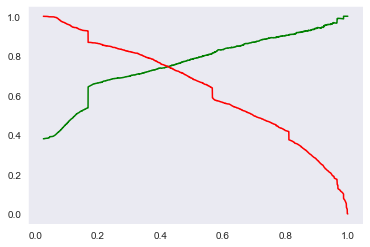

In [366]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [367]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.071690,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.168947,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.085554,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.876823,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.041222,0,1,0,0,0,0,0,0,0,0,0,0


In [368]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.812059119919382

In [369]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3218,  532],
       [ 587, 1617]], dtype=int64)

In [370]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [371]:
# Calculate Precision

TP/(TP+FP)

0.752442996742671

In [372]:
# Calculate Recall

TP/(TP+FN)

0.7336660617059891

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [373]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [374]:
y_test_pred[:10]

8354    0.123035
1149    0.995097
1528    0.692966
2651    0.811052
8240    0.016276
6517    0.319265
3014    0.566302
4189    0.168947
4166    0.117568
5124    0.091104
dtype: float64

In [375]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [376]:
# Let's see the head

y_pred_1.head()

,0
8354,0.123035
1149,0.995097
1528,0.692966
2651,0.811052
8240,0.016276


In [377]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [378]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [379]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [380]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.123035
1,1,0.995097
2,1,0.692966
3,1,0.811052
4,0,0.016276


In [381]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [382]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123035
1,1,0.995097
2,1,0.692966
3,1,0.811052
4,0,0.016276


In [383]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [384]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.123035,0
1,1,0.995097,1
2,1,0.692966,1
3,1,0.811052,1
4,0,0.016276,0


In [385]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7947512730121425

In [386]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1250,  358],
       [ 166,  779]], dtype=int64)

In [387]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [388]:
# Calculate Precision

TP/(TP+FP)

0.6851363236587511

In [389]:
# Calculate Recall

TP/(TP+FN)

0.8243386243386244

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8243386243386244

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

0.777363184079602